#### Install pydotplus
In order to generate the figures in this notebook you need the pydotplus package
* Using Conda: `conda install -c conda-forge pydotplus`
* Using pip: `pip install pydotplus`

In [1]:
import sklearn
print 'sklearn version=',sklearn.__version__
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
# print 'pydotplus version=',pydotplus.__version__
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import IPython
print 'IPython version=',IPython.__version__
from IPython.display import Image 

sklearn version= 0.18.1
IPython version= 5.3.0


Data Description
1. Multiclass classification problem with 3 labels: {1,2,3} representing 3 different cultivators
2. 13 continuous attributes describing the properties of wine like alcohol, Ash etc.
3. UCI Machine Learning Repository

In [2]:
# Load the wine dataset
data = pd.read_csv('../../data/wine/wine_original.csv')
labels = data['class']
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

In [3]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680


In [4]:
# Define Model
clf = DecisionTreeClassifier(criterion='entropy')
# Train
clf.fit(X_train, y_train)
# Predict
y_pred = clf.predict(X_test)
#Evaluate
y_pred_train = clf.predict(X_train)
print ('Train accuracy = ' + str(np.sum(y_pred_train == y_train)*1.0/len(y_train)))

Train accuracy = 1.0


In [5]:
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.805555555556


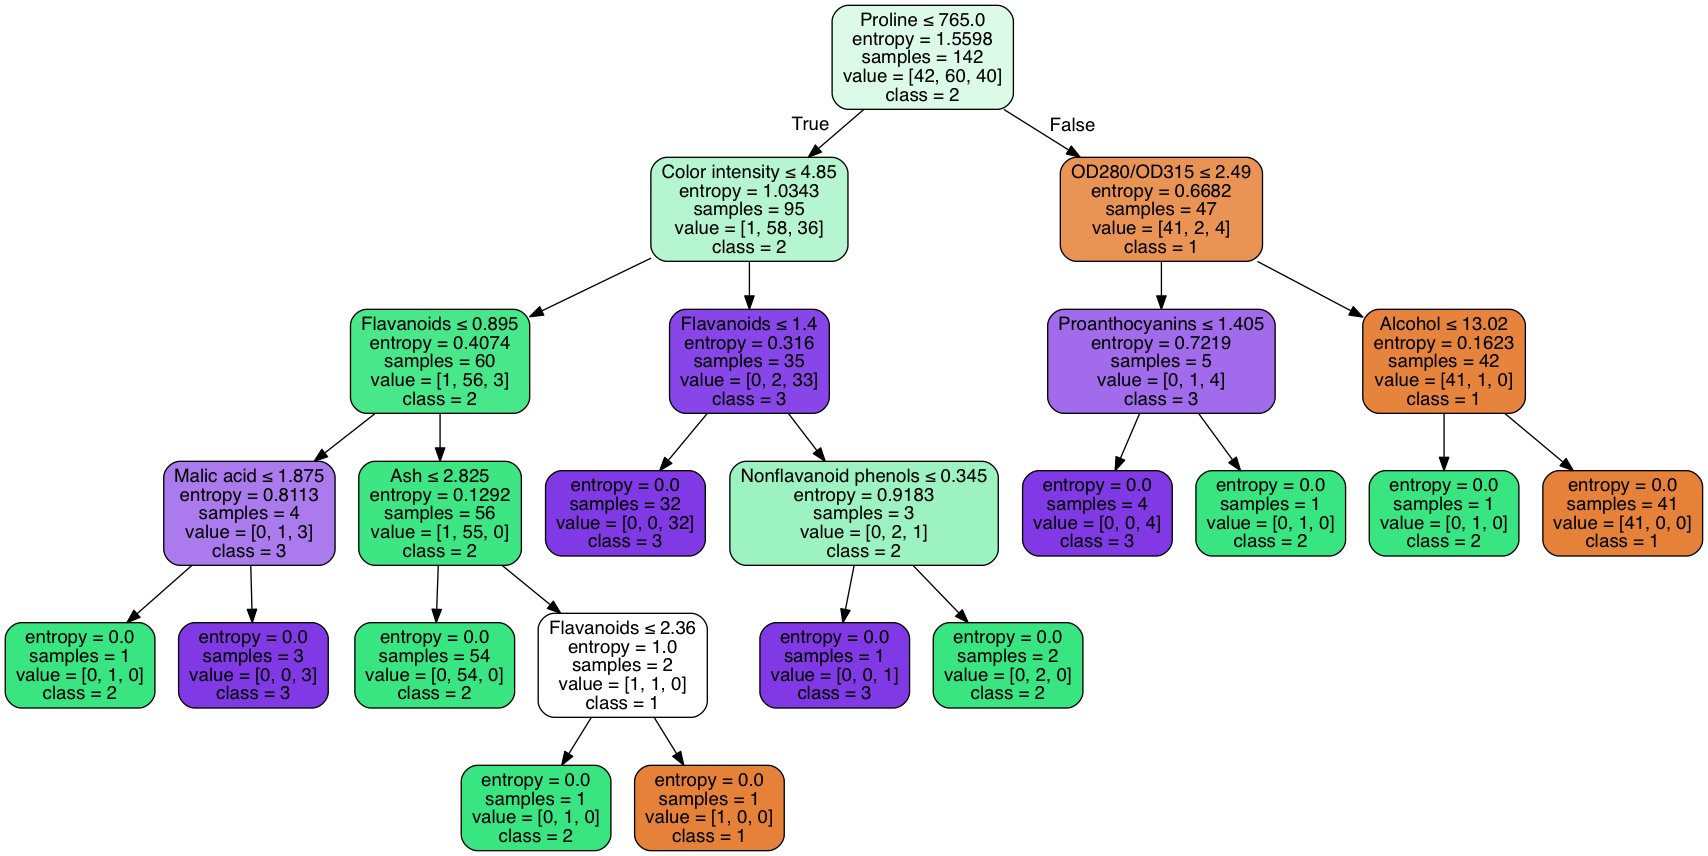

In [6]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [7]:
# Max Depth of tree

# Define Model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
# Train
clf.fit(X_train, y_train)
# Predict
y_pred = clf.predict(X_test)
# Evaluate
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.833333333333


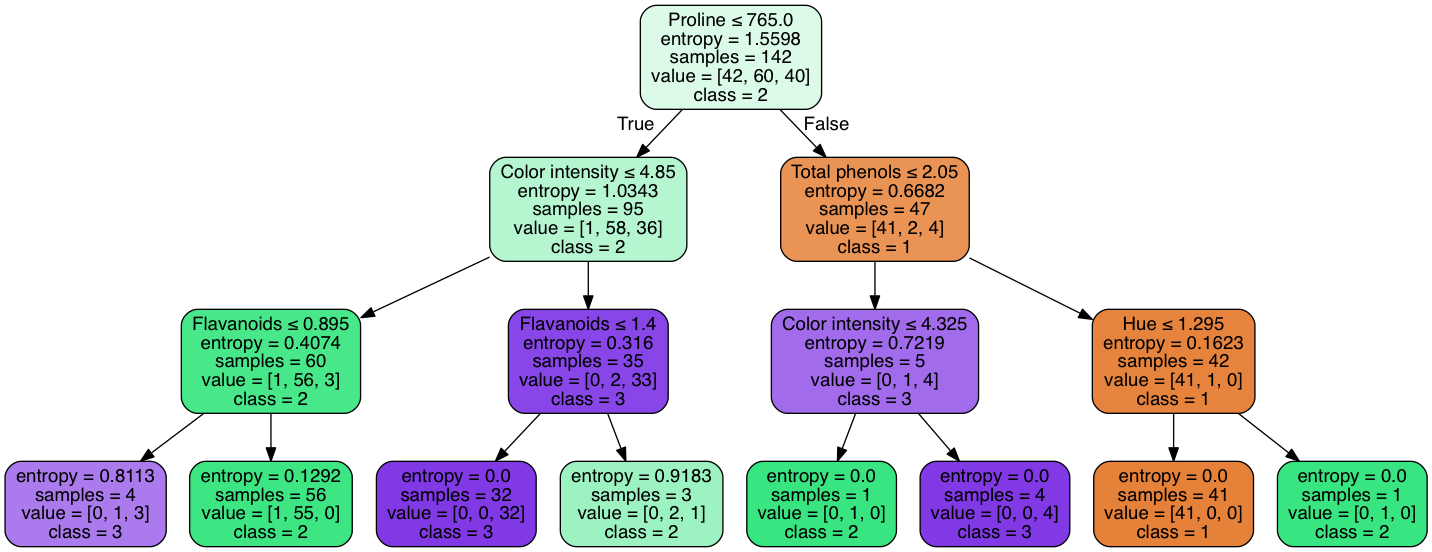

In [8]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [9]:
X_test.loc[1]

Alcohol                   13.20
Malic acid                 1.78
Ash                        2.14
Alcalinity of ash         11.20
Magnesium                100.00
Total phenols              2.65
Flavanoids                 2.76
Nonflavanoid phenols       0.26
Proanthocyanins            1.28
Color intensity            4.38
Hue                        1.05
OD280/OD315                3.40
Proline                 1050.00
Name: 1, dtype: float64

In [10]:
y_pred[0]

1

In [11]:
#Min Sample Split

# Define Model
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
# Train
clf.fit(X_train, y_train)
# Predict
y_pred = clf.predict(X_test)
#Evaluate
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.861111111111


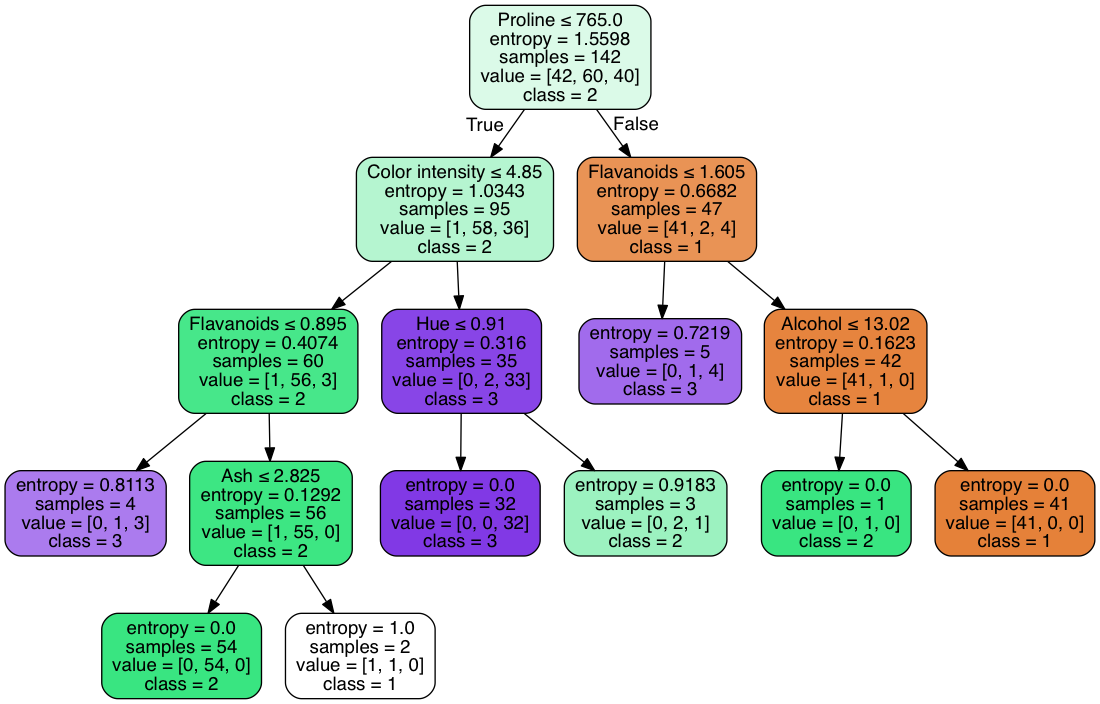

In [12]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [13]:
#min samples leaf

# Define Model
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
# Train
clf.fit(X_train, y_train)
# Predict
y_pred = clf.predict(X_test)
# Evaluate
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.75


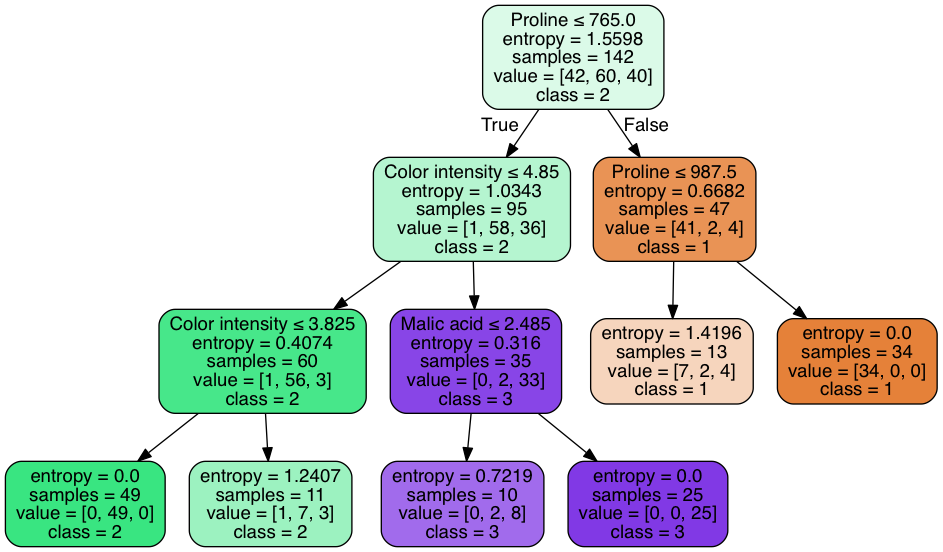

In [14]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())